In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv('ProjectSample/IRIS.CSV')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning

In [3]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [5]:
data=data.drop_duplicates()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Feature engineering/Preprocessing

In [6]:
#map species to numerical values
data['species']=data['species'].astype('category').cat.codes
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
selected_columns=['sepal_length',	'sepal_width',	'petal_length',	'petal_width',	'species']
data_selected=data[selected_columns]
data_selected.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


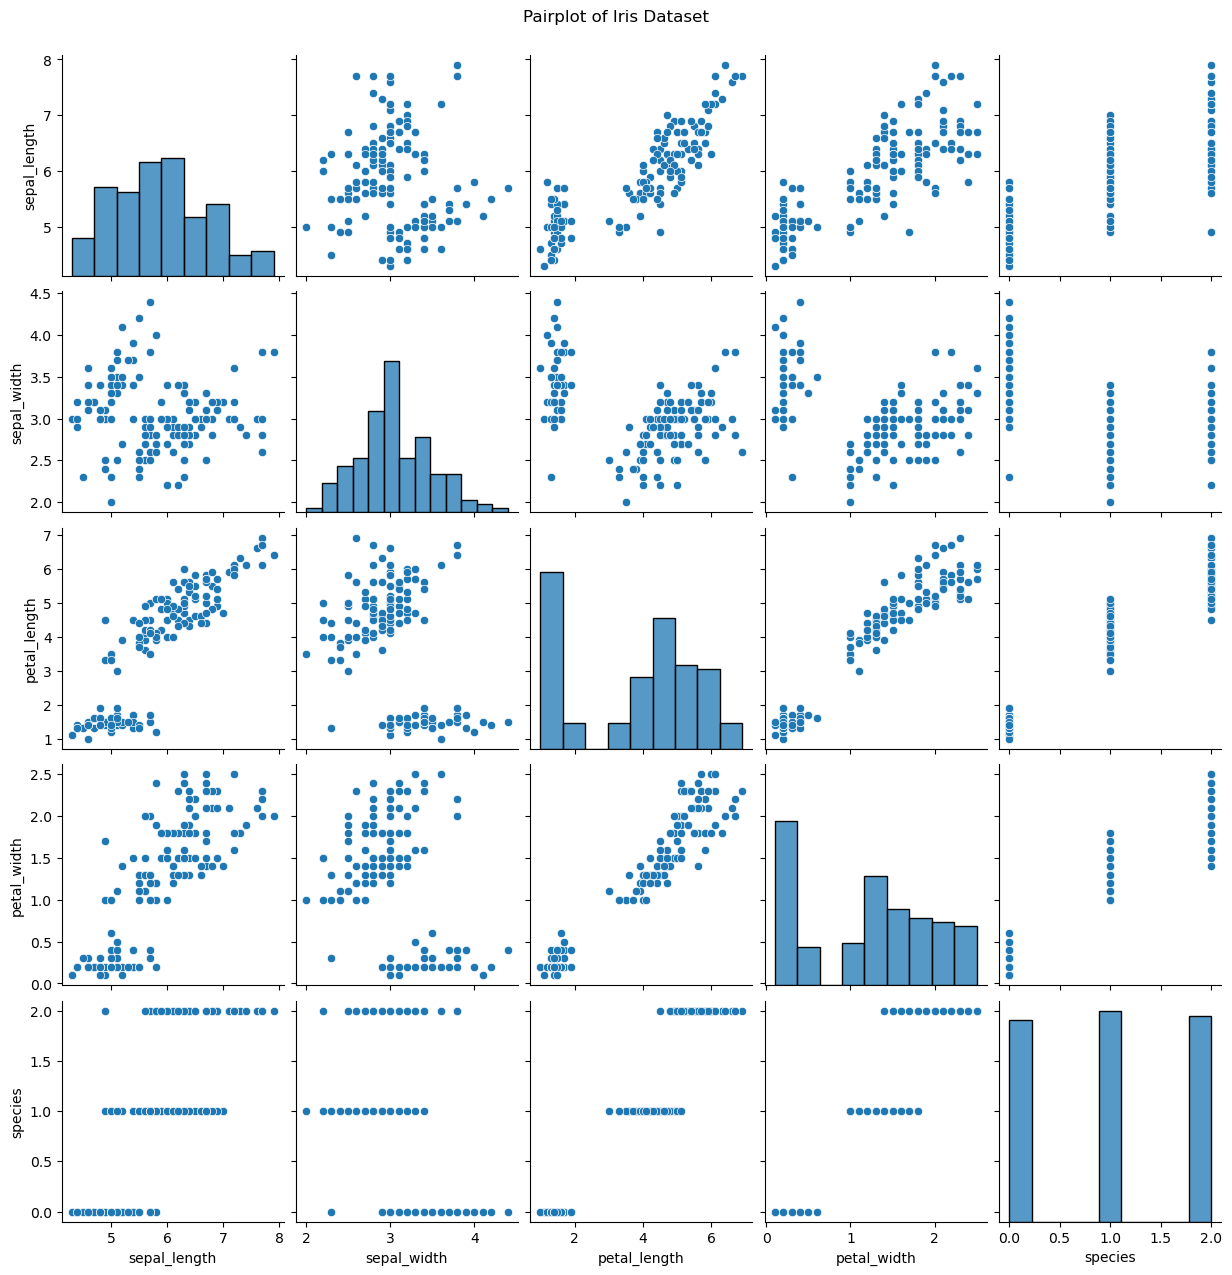

In [8]:
sns.pairplot(data_selected)
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

In [9]:
corr=data_selected.corr()#correlations
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


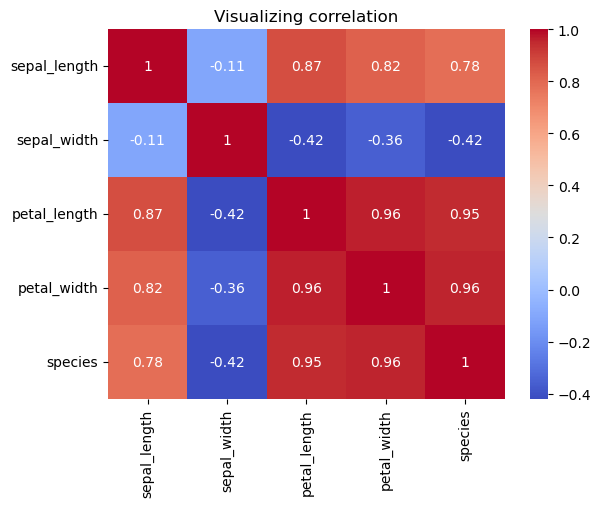

In [10]:
sns.heatmap(corr, annot =True, cmap='coolwarm')
plt.title('Visualizing correlation')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
#features and target variable
x=data.drop('species', axis=1)
y=data['species']

#split the dataset into training and testing sets
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int8

## Modelling

### Training Logistic Regression

In [21]:
# import the logisticregression class from sklearn
from sklearn.linear_model import LogisticRegression

#initialize the Logistic Regression
logistic_model = LogisticRegression()

#fit the model to the training data (x_train and y_train)
logistic_model.fit(x_train, y_train)

LogisticRegression()

## Validating Logistic Regression

In [22]:
#prdict the target variable for the test data(x_test)
y_pred_logistic =logistic_model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Logistic Regression Results')
print('Accuracy', accuracy_score(y_test, y_pred_logistic))

Logistic Regression Results
Accuracy 0.9333333333333333


In [24]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
x=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]#independent variable
y=data['species']#target variable(what we want to predict)
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [26]:
# import the logisticregression class from sklearn
from sklearn.linear_model import LogisticRegression

#initialize the Logistic Regression
logistic_model = LogisticRegression()

#fit the model to the training data (x_train and y_train)
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [30]:
#prdict the target variable for the test data(x_test)
y_pred_logistic =logistic_model.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Logistic Regression Results')
print('Accuracy', accuracy_score(y_test, y_pred_logistic))

Logistic Regression Results
Accuracy 0.9333333333333333


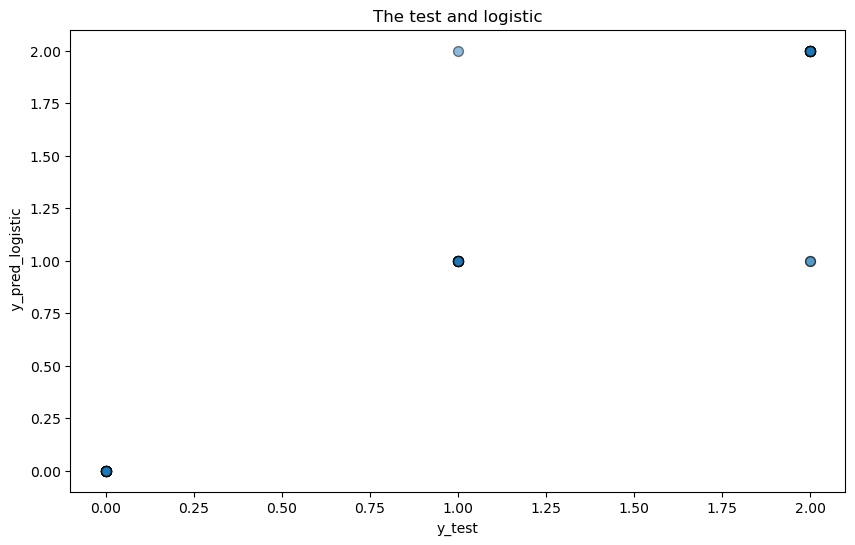

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_logistic, alpha=0.5, edgecolors='k', s=50)  

plt.title('The test and logistic')
plt.xlabel('y_test')
plt.ylabel(' y_pred_logistic')

plt.show()

## RANDOM FOREST MODEL

In [ ]:
from sklearn.model_selection import train_test_split
#features and target variable
x=data.drop('species', axis=1)
y=data['species']

#split the dataset into training and testing sets
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
rm_pred=rm.predict(x_test)

In [57]:
rm_accuracy = accuracy_score(y_test, rm_pred)
rm_accuracy

0.9555555555555556

## KNN 

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
kn=KNeighborsClassifier(n_neighbors = 4)
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [81]:
kn_pred=kn.predict(x_test)

In [83]:
kn_accuracy = accuracy_score(y_test, kn_pred)
kn_accuracy

0.9555555555555556

In [85]:
from sklearn.svm import SVC

In [95]:
sv=SVC()
sv.fit(x_train, y_train)

SVC()

In [97]:
sv_pred=sv.predict(x_test)

In [99]:
sv_accuracy = accuracy_score(y_test, sv_pred)
sv_accuracy

0.9555555555555556

### ASSIGNMENT
#### EMBEDDING AND SAVING MODELS TO A FILE
##### How to parse these values directly
p_wi =4.5
s_width =5.7
p_len=6.4
s_len =3.3